In [1]:
# first we will import the the dataset from kaggle and than visualize it

# Imports
import pandas as pd # for Data

# For visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for time stamps
from datetime import datetime as dt

In [3]:
# import data from yfinance
import yfinance as yf

# list of the companies
company_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# set the time frame
end_date = dt.today()
start_date = dt(end_date.year-10, end_date.month , end_date.day)

# get the data
data = yf.download(company_list, start=start_date, end=end_date)

[*********************100%***********************]  4 of 4 completed


In [5]:
# took only apple data
apple_data = data.xs('AAPL', level='Ticker', axis=1)

# convert this raw data to a dataframe
df = pd.DataFrame(apple_data)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-10-06 00:00:00+00:00,22.113331,24.905001,25.162500,24.855000,24.987499,148204800
2014-10-07 00:00:00+00:00,21.920214,24.687500,25.030001,24.682501,24.857500,168376800
2014-10-08 00:00:00+00:00,22.375267,25.200001,25.277500,24.577499,24.690001,229618800
2014-10-09 00:00:00+00:00,22.424093,25.254999,25.594999,25.152500,25.385000,309506000
2014-10-10 00:00:00+00:00,22.359724,25.182501,25.507500,25.075001,25.172501,265326400


In [7]:
df.shape

(2517, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-10-06 00:00:00+00:00 to 2024-10-04 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2517 non-null   float64
 1   Close      2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Open       2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [13]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,89.302563,91.354944,92.262115,90.360367,91.283619,1.209391e+08
std,62.756010,62.269025,62.879571,61.591942,62.218577,6.949564e+07
min,20.720041,22.584999,22.917500,22.367500,22.500000,2.404830e+07
25%,33.118679,35.547501,35.730000,35.277500,35.527500,7.415070e+07
50%,54.617805,56.907501,57.417500,56.587502,56.990002,1.034332e+08
75%,147.004791,149.029999,150.369995,147.479996,148.899994,1.477132e+08
max,234.548523,234.820007,237.229996,233.089996,236.479996,6.488252e+08


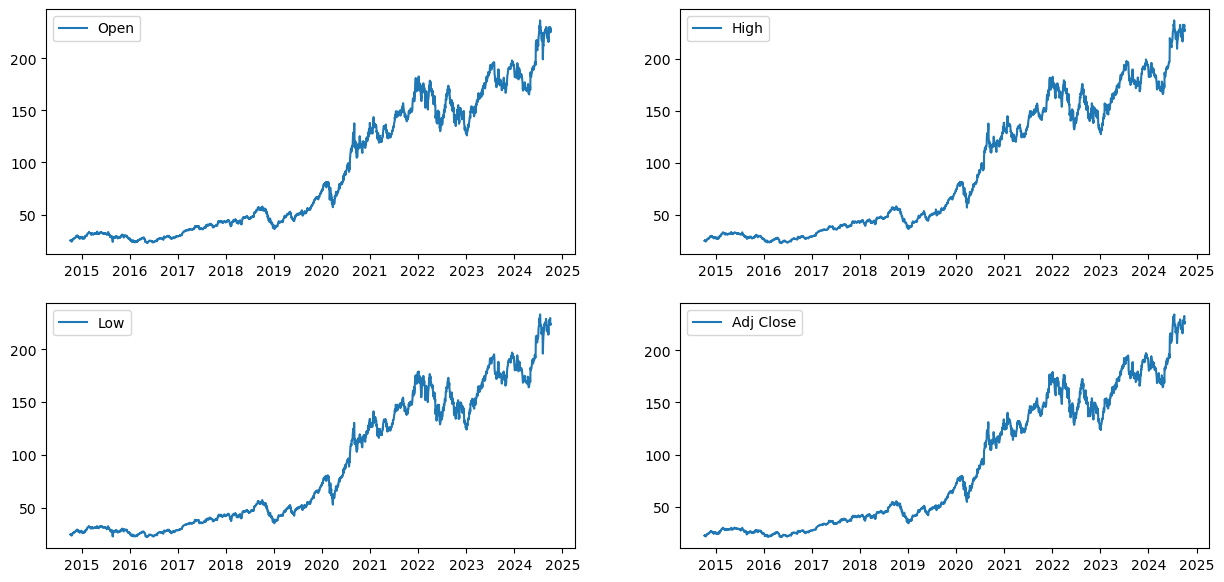

In [21]:
# visualise the data in 4 subplotes
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plt.plot(df['Open'], label='Open')
plt.legend()

plt.subplot(2,2,2)
plt.plot((df['High']), label='High')
plt.legend()

plt.subplot(2,2,3)
plt.plot((df['Low']), label='Low')
plt.legend()

plt.subplot(2,2,4)
plt.plot((df['Adj Close']), label='Adj Close')
plt.legend()

In [22]:
# the moving average for past 25 ,10 ,15 days

def Plot_Moving_Average(data, lag):
    plt.figure(figsize=(10,7))
    plt.plot(data, label='Data' ,linewidth=3)
    for i in range(len(lag)):
        plt.plot(data.rolling(lag[i]).mean(), label=f"{lag[i]} Days")
    plt.legend()
    plt.title(f"Moving Average for different days for '{data.name}'")
    plt.show()

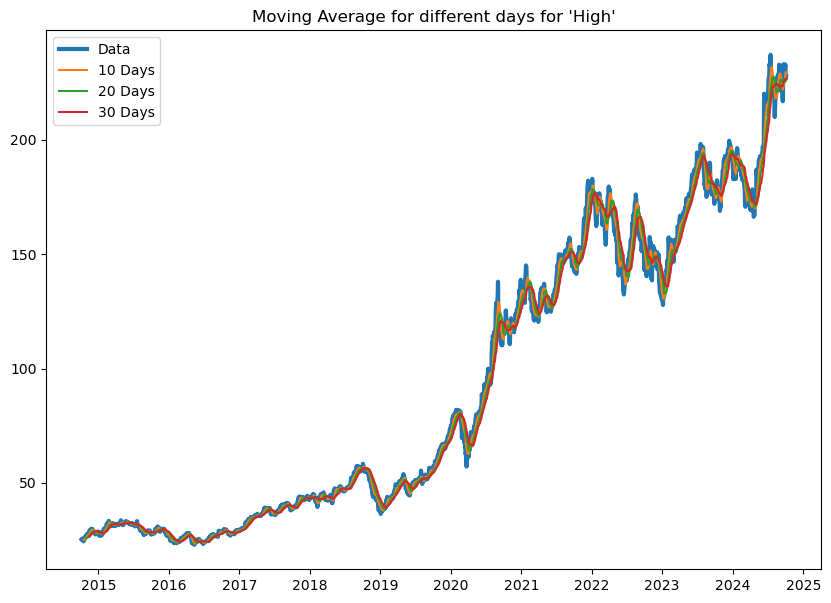

In [25]:
Plot_Moving_Average(apple_data['High'],[10,20,30])

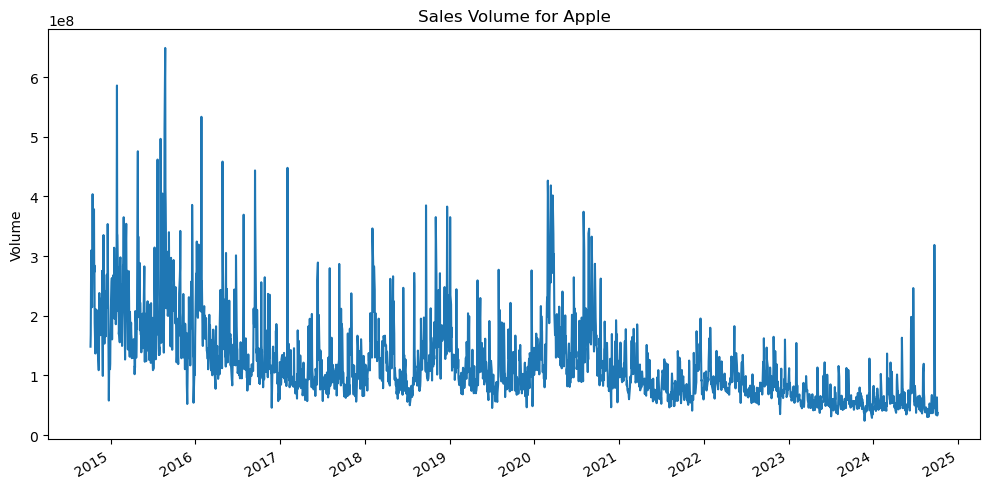

In [41]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(10, 5))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for Apple")    
plt.tight_layout()

Text(0.5, 1.0, 'APPLE')

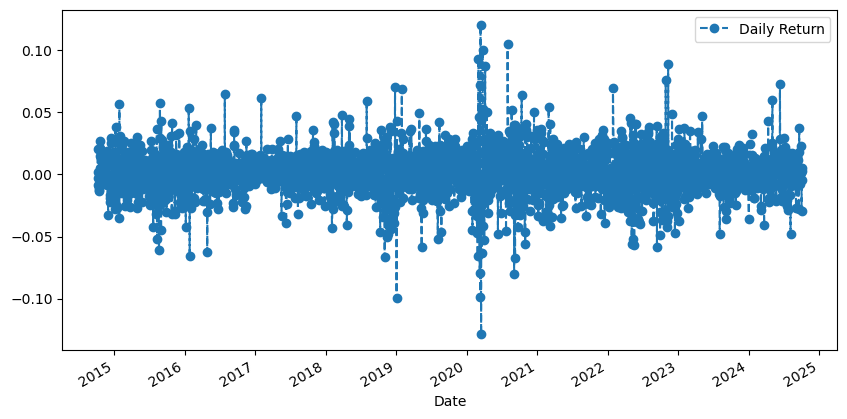

In [57]:
# We'll use pct_change to find the percent change for each day
plt.figure(figsize=(10,5))
df['Daily Return'] = df['Adj Close'].pct_change()
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

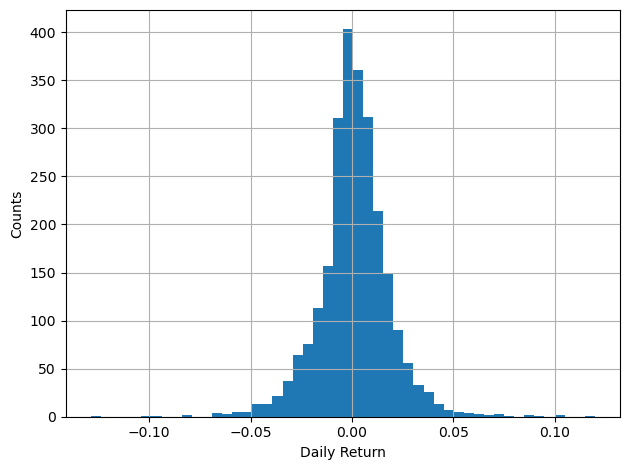

In [61]:
#visualizing daily return in histogram
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
    
plt.tight_layout()